In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


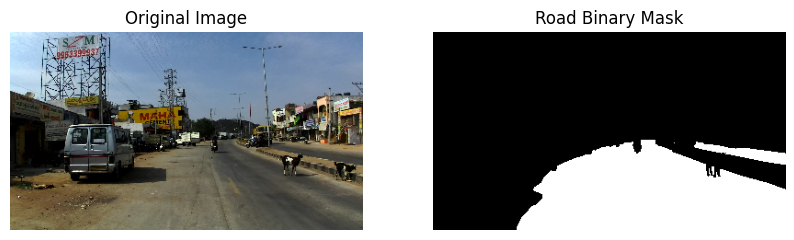

In [ ]:
import os
import json
from shapely.geometry import Polygon
from PIL import Image, ImageDraw
import numpy as np
import cv2

folder_number = "201"
frame_number = "0299"

image_path = '/content/drive/MyDrive/Segnet IDD Project/Dataset/leftImg8bit/train/' + folder_number + '/frame' + frame_number + '_leftImg8bit.jpg'
json_path = '/content/drive/MyDrive/Segnet IDD Project/Dataset/gtFine/train/' + folder_number + '/frame' + frame_number + '_gtFine_polygons.json'

image = np.array(Image.open(image_path))
resize_factor = 5
image_height, image_width = image.shape[:2]
new_resolution = (int(image_width // resize_factor), int(image_height // resize_factor))
image = cv2.resize(image, new_resolution)

with open(json_path, 'r') as f:
    data = json.load(f)

road_polygons = [obj['polygon'] for obj in data['objects'] if obj['label'] != 'road']

mask_size = ([int(image_width // resize_factor), int(image_height // resize_factor)])
road_mask = Image.new('L', mask_size, 0)
draw = ImageDraw.Draw(road_mask)

for polygon in road_polygons:
    polygon_coords = [(point[0]//resize_factor, point[1]//resize_factor) for point in polygon]
    draw.polygon(polygon_coords, outline=1, fill=1)

road_mask_np = np.array(road_mask)
road_mask_np = 1 - road_mask_np

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(road_mask_np, cmap='gray')
plt.title('Road Binary Mask')
plt.axis('off')

plt.show()


In [ ]:
image.shape

(216, 384, 3)

In [ ]:
road_mask_np.shape

(216, 384)

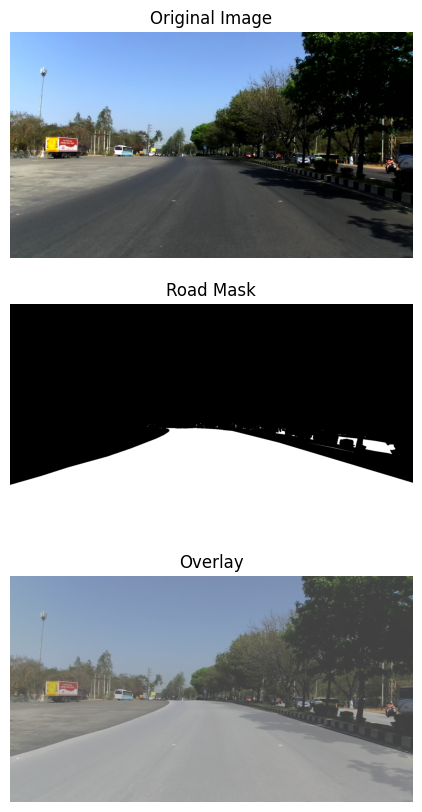

19
{'sky', 'billboard', 'curb', 'vehicle fallback', 'vegetation', 'rider', 'pole', 'autorickshaw', 'motorcycle', 'bus', 'obs-str-bar-fallback', 'truck', 'wall', 'drivable fallback', 'traffic sign', 'road', 'non-drivable fallback', 'car', 'person'}


In [ ]:
import os
import json
from shapely.geometry import Polygon, MultiPolygon
from PIL import Image, ImageDraw
import numpy as np
import cv2
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon as mplPolygon

folder_number = "236"
frame_number = "3789"

image_path = '/content/drive/MyDrive/Segnet IDD Project/Dataset//leftImg8bit/train/' + folder_number + '/frame' + frame_number + '_leftImg8bit.jpg'
json_path = '/content/drive/MyDrive/Segnet IDD Project/Dataset//gtFine/train/' + folder_number + '/frame' + frame_number + '_gtFine_polygons.json'

image = np.array(Image.open(image_path))
resize_factor = 1
image_height, image_width = image.shape[:2]
new_resolution = (int(image_width // resize_factor), int(image_height // resize_factor))
image = cv2.resize(image, new_resolution)

with open(json_path, 'r') as f:
    data = json.load(f)

road_polygons = [obj['polygon'] for obj in data['objects'] if obj['label'] == 'road']

other_polygons = [obj['polygon'] for obj in data['objects'] if obj['label'] != 'road']

road_shapes = [Polygon(polygon) for polygon in road_polygons]
other_shapes = [Polygon(polygon) for polygon in other_polygons]

resulting_shapes = road_shapes.copy()
for other_shape in other_shapes:
    if not other_shape.is_valid:
        other_shape = other_shape.buffer(0)
    resulting_shapes = [road_shape.difference(other_shape) for road_shape in resulting_shapes]

if isinstance(resulting_shapes[0], MultiPolygon):
    resulting_shapes = [polygon for multi_polygon in resulting_shapes for polygon in multi_polygon.geoms]

mask_size = ([int(image_width // resize_factor), int(image_height // resize_factor)])
resulting_mask = Image.new('L', mask_size, 0)
draw = ImageDraw.Draw(resulting_mask)

for polygon in resulting_shapes:
    polygon_coords = [(point[0] / resize_factor, point[1] / resize_factor) for point in polygon.exterior.coords]
    draw.polygon(polygon_coords, outline=1, fill=1)

resulting_mask_np = np.array(resulting_mask)


plt.figure(figsize=(24, 10))

plt.subplot(3, 1, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(3, 1, 2)
plt.imshow(resulting_mask_np, cmap='gray')
plt.title('Road Mask')
plt.axis('off')

plt.subplot(3, 1, 3)
plt.imshow(resulting_mask_np, cmap='gray', alpha=0.5)
plt.imshow(image, alpha=0.5)
plt.title('Overlay')
plt.axis('off')

plt.show()


classes = [obj['label'] for obj in data['objects']]
print(len(set(classes)))
print(set(classes))